<a href="https://colab.research.google.com/github/Azeezmariam/Group1_Water-Quality-Model/blob/main/Group1_Water_Quality_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **GROUP 1 - Water Quality Model - Our First Model**

In [28]:
#Import libraries
import numpy as np
import pandas as pd
import tensorflow as tf
import seaborn as sns
from sklearn.datasets import make_moons
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.regularizers import l1, l2
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam, RMSprop
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.utils import class_weight
from sklearn.metrics import confusion_matrix

In [29]:
#Connect to Google Drive
from google.colab import drive
drive.mount('/content/drive')

#Load the dataset
file_path = '/content/drive/My Drive/water_potability.csv'
data = pd.read_csv(file_path)

# Display part of the dataset
data.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


# **1- DATA PREPROCESSING**

In [30]:
#Data Preprocessing
# Handling missing data by filling missing values with the median of their respective columns
data_filled = data.fillna(data.median())

# Split the dataset into features (X) and target (Y)
X = data_filled.drop('Potability', axis=1)
Y = data_filled['Potability']

# Check if scaling is necessary by looking at the range of feature values
X.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
count,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000
mean,7.074194,196.369496,22014.092526,7.122277,333.608364,426.205111,14.284970,66.407478,3.966786
std,1.470040,32.879761,8768.570828,1.583085,36.143851,80.824064,3.308162,15.769958,0.780382
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000
25%,6.277673,176.850538,15666.690297,6.127421,317.094638,365.734414,12.065801,56.647656,3.439711
50%,7.036752,196.967627,20927.833607,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028
75%,7.870050,216.667456,27332.762127,8.114887,350.385756,481.792304,16.557652,76.666609,4.500320
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000


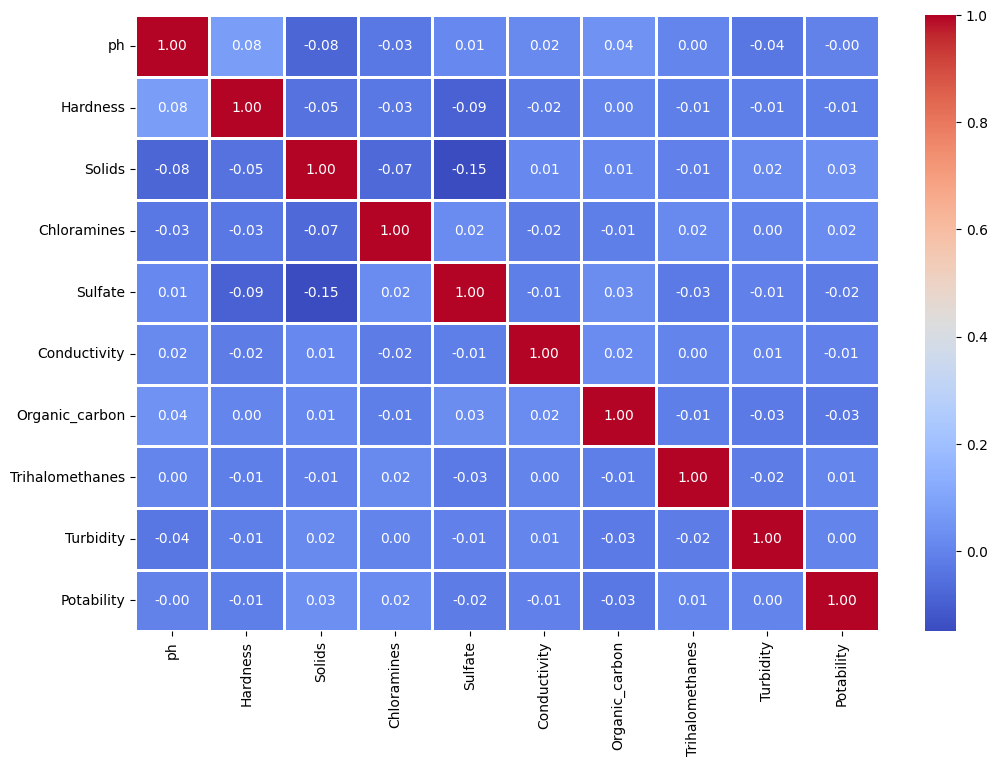

In [31]:
# fill the missing data with the mean of the column
data = data.fillna(data.mean())

# draw the seaborn graph of the distribution of the data using the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=2)
plt.show()

# **2- DATA SPLITTING**

In [32]:
#Data Splitting

#Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y, test_size=0.2, random_state=42)

#Display the shape of the result
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape


((2620, 9), (656, 9), (2620,), (656,))

# **3-MODEL ARCHITECTURE**

In [33]:
#Vanilla model
# Define the model architecture
model = Sequential()
model.add(Dense(64, input_shape=(X_train.shape[1],), activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer=Adam(learning_rate=0.001), loss="binary_crossentropy", metrics=["accuracy"])


# Display model summary
model.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_20 (Dense)                     │ (None, 64)                  │             640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_21 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_22 (Dense)                     │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,753 (10.75 KB)

 Trainable params: 2,753 (10.75 KB)

 Non-trainable params: 0 (0.00 B)

In [34]:
history = model.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=100, batch_size=32, verbose=1)

Epoch 1/100
82/82 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.5531 - loss: 0.6896 - val_accuracy: 0.6494 - val_loss: 0.6429
Epoch 2/100
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6396 - loss: 0.6435 - val_accuracy: 0.6768 - val_loss: 0.6210
Epoch 3/100
82/82 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6838 - loss: 0.6144 - val_accuracy: 0.6951 - val_loss: 0.6031
Epoch 4/100
82/82 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6686 - loss: 0.6179 - val_accuracy: 0.6860 - val_loss: 0.5996
Epoch 5/100
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7042 - loss: 0.5849 - val_accuracy: 0.6875 - val_loss: 0.5983
Epoch 6/100
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7176 - loss: 0.5831 - val_accuracy: 0.6982 - val_loss: 0.5899
Epoch 7/100
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6962 - loss: 0.5749 - val_accuracy: 0.6890 - val_loss: 0.5924
Epoch 8/100
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7043 - loss: 0.5709 - val_accuracy: 0.6845 - v

In [35]:
print(np.unique(Y_train))


[0 1]


In [36]:
# Ensure Y_train is a numpy array to avoid Pandas indexing issues
Y_train = np.array(Y_train)
Y_test = np.array(Y_test)

# Compute class weights
class_weights_dict = {0: 0.8259773013871374, 1: 1.2669245647969052}
# Define the model architecture
model = Sequential()
model.add(Dense(64, input_shape=(X_train.shape[1],), activation='relu'))
#model.add(Dropout(0.5))  # Adding dropout to prevent overfitting
#model.add(Dense(units=64, activation='relu'))
#model.add(Dropout(0.5))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile the model with a lower learning rate
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

#Early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)

# Compute class weights (if dataset is imbalanced)
import numpy as np
from sklearn.utils import class_weight

# Compute class weights
class_weights = class_weight.compute_class_weight('balanced', classes=np.unique(Y_train), y=Y_train)

# Convert the class weights array into a dictionary
class_weights_dict = {i: class_weights[i] for i in np.unique(Y_train)}
print(class_weights_dict)


# Train the model using the correct class_weights dictionary
history = model.fit(X_train, Y_train,
                    validation_data=(X_test, Y_test),
                    epochs=100,
                    batch_size=32)

# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test, Y_test)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")


{0: 0.8259773013871374, 1: 1.2669245647969052}
Epoch 1/100
82/82 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.5687 - loss: 0.6812 - val_accuracy: 0.6341 - val_loss: 0.6483
Epoch 2/100
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6264 - loss: 0.6454 - val_accuracy: 0.6540 - val_loss: 0.6295
Epoch 3/100
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6840 - loss: 0.6090 - val_accuracy: 0.6875 - val_loss: 0.6174
Epoch 4/100
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6701 - loss: 0.6172 - val_accuracy: 0.6890 - val_loss: 0.6029
Epoch 5/100
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6774 - loss: 0.6044 - val_accuracy: 0.6875 - val_loss: 0.5989
Epoch 6/100
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6877 - loss: 0.5906 - val_accuracy: 0.6860 - val_loss: 0.5969
Epoch 7/100
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6913 - loss: 0.5896 - val_accuracy: 0.6829 - val_loss: 0.5972
Epoch 8/100
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0

21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
Confusion Matrix


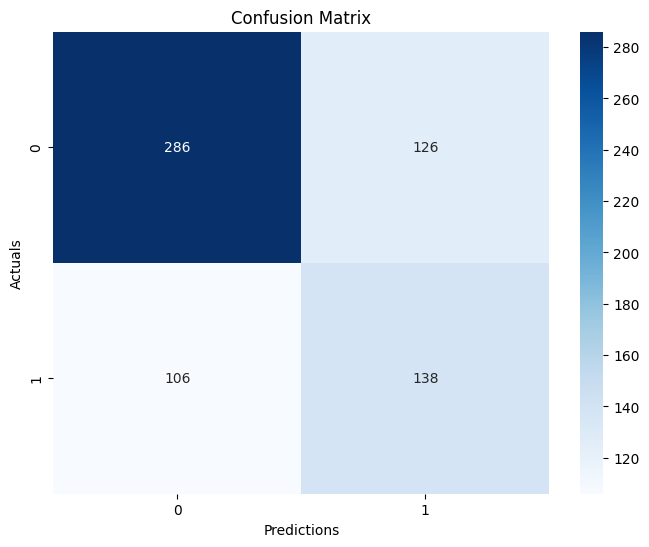

In [37]:
# lets print the confusion matrix and classification report
pred = model.predict(X_test)
pred = np.round(pred)



print("Confusion Matrix")
cm = confusion_matrix(Y_test, pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predictions')
plt.ylabel('Actuals')
plt.title('Confusion Matrix')
plt.show()

In [38]:
print(class_weights_dict)


{0: 0.8259773013871374, 1: 1.2669245647969052}


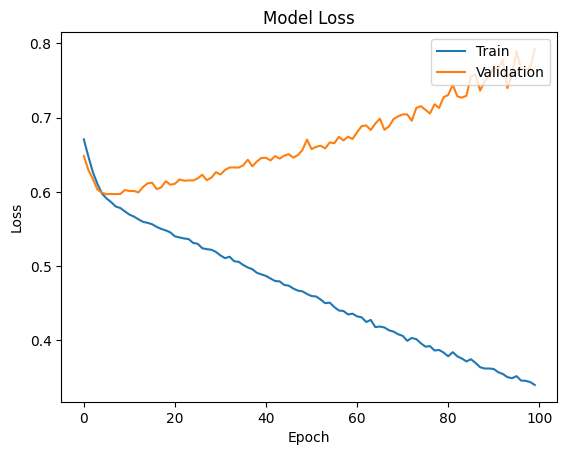

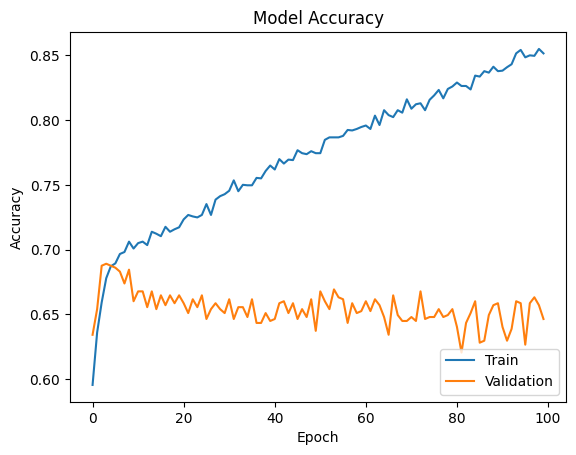

In [39]:
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='lower right')
plt.show()


# **L1 with RMSPROP**

In [40]:
model = Sequential()

model.add(Dense(
    64,
    input_dim=X_train.shape[1],
    activation='relu',
    kernel_regularizer=l1(0.01)
))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Additional Hidden layers

In [41]:
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(8, activation='relu'))

Output layer

In [42]:
model.add(Dense(1, activation='sigmoid'))

Compilation of the model with RMSprop

In [43]:
model.compile(
    optimizer=RMSprop(learning_rate=0.01),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

In [44]:
history = model.fit(X_train, Y_train, epochs=100, batch_size=32, validation_data=(X_test, Y_test))

Epoch 1/100
82/82 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.5961 - loss: 0.9105 - val_accuracy: 0.6280 - val_loss: 0.6965
Epoch 2/100
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6037 - loss: 0.7036 - val_accuracy: 0.6280 - val_loss: 0.6914
Epoch 3/100
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6132 - loss: 0.6982 - val_accuracy: 0.6280 - val_loss: 0.6886
Epoch 4/100
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5923 - loss: 0.7064 - val_accuracy: 0.6280 - val_loss: 0.6885
Epoch 5/100
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6110 - loss: 0.6982 - val_accuracy: 0.6280 - val_loss: 0.6902
Epoch 6/100
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6105 - loss: 0.6982 - val_accuracy: 0.6280 - val_loss: 0.6903
Epoch 7/100
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6048 - loss: 0.7007 - val_accuracy: 0.6280 - val_loss: 0.6887
Epoch 8/100
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6114 - loss: 0.6974 - val_accuracy: 0.6280 - v

In [45]:
loss, accuracy = model.evaluate(X_test, Y_test)
print(f"Test accuracy (with L1 Regularization): {accuracy}")

21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6400 - loss: 0.6850 
Test accuracy (with L1 Regularization): 0.6280487775802612


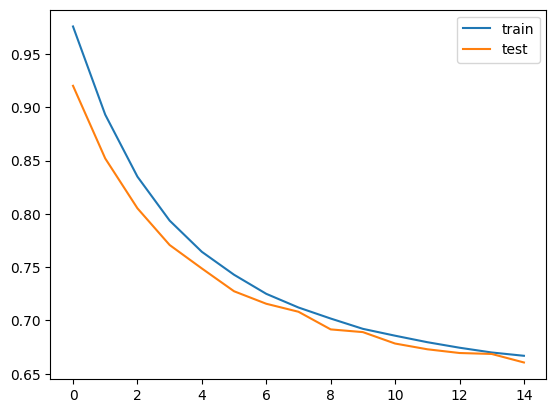

In [54]:
# plot training history
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
Confusion Matrix


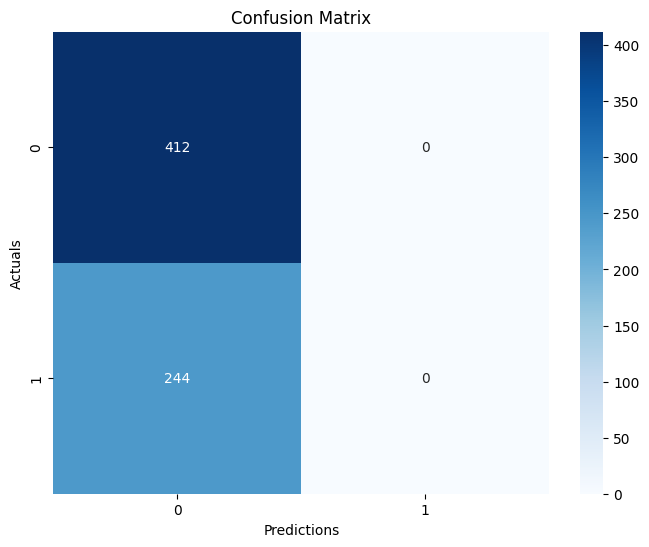

In [46]:
pred = model.predict(X_test)
pred = np.round(pred)



print("Confusion Matrix")
cm = confusion_matrix(Y_test, pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predictions')
plt.ylabel('Actuals')
plt.title('Confusion Matrix')
plt.show()

# **L2 with Adam**

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Train: 0.613, Test: 0.640


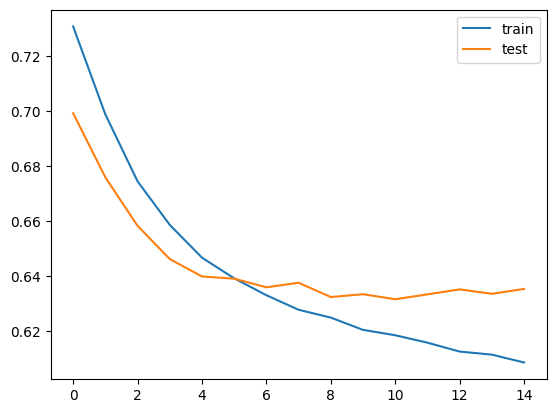

In [55]:

model_l2 = Sequential()
model_l2.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],), kernel_regularizer=l2(0.001)))
model_l2.add(Dense(32, activation='relu', kernel_regularizer=l2(0.001)))
model_l2.add(Dense(1, activation='sigmoid', kernel_regularizer=l2(0.001)))

#Compile the model
model_l2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# fit model
history = model_l2.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=4000, verbose=0, callbacks=[early_stopping])


# evaluate the model
_, train_acc = model_l2.evaluate(X_train, Y_train, verbose=0)
_, test_acc = model_l2.evaluate(X_test, Y_test, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))


# plot training history
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

**L2 with Dropout**

Train: 0.61, Test: 0.63


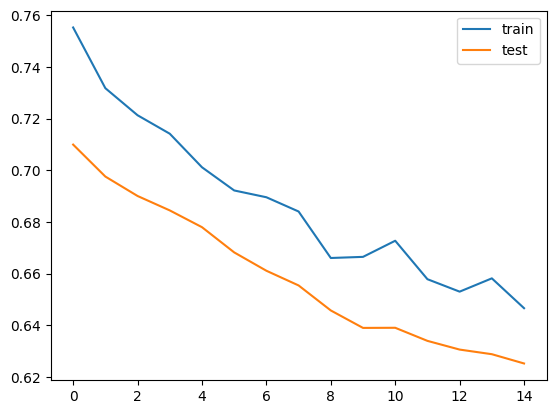

In [56]:
model_l2_dropout = Sequential()
model_l2_dropout.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],), kernel_regularizer=l2(0.001)))
model_l2_dropout.add(tf.keras.layers.Dropout(0.4))
model_l2_dropout.add(Dense(32, activation='relu', kernel_regularizer=l2(0.001)))
model_l2_dropout.add(tf.keras.layers.Dropout(0.4))
model_l2_dropout.add(Dense(1, activation='sigmoid', kernel_regularizer=l2(0.001)))

#Compile the model
model_l2_dropout.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# fit model
history = model_l2_dropout.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=4000, verbose=0, callbacks=[early_stopping])


# evaluate the model
_, train_acc = model_l2_dropout.evaluate(X_train, Y_train, verbose=0)
_, test_acc = model_l2_dropout.evaluate(X_test, Y_test, verbose=0)
print('Train: %.2f, Test: %.2f' % (train_acc, test_acc))


# plot training history
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Train: 0.630, Test: 0.657


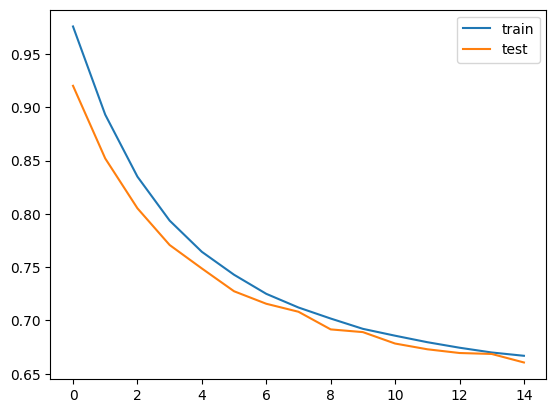

In [51]:
model_l1 = Sequential()
model_l1.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],), kernel_regularizer=l1(0.001)))
model_l1.add(Dense(32, activation='relu', kernel_regularizer=l1(0.001)))
model_l1.add(Dense(1, activation='sigmoid', kernel_regularizer=l1(0.001)))

# Compile the model with RMSprop optimizer
model_l1.compile(optimizer=RMSprop(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Fit the model
history = model_l1.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=4000, verbose=0, callbacks=[early_stopping])

# Evaluate the model
_, train_acc = model_l1.evaluate(X_train, Y_train, verbose=0)
_, test_acc = model_l1.evaluate(X_test, Y_test, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

# Plot training history
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
Confusion Matrix


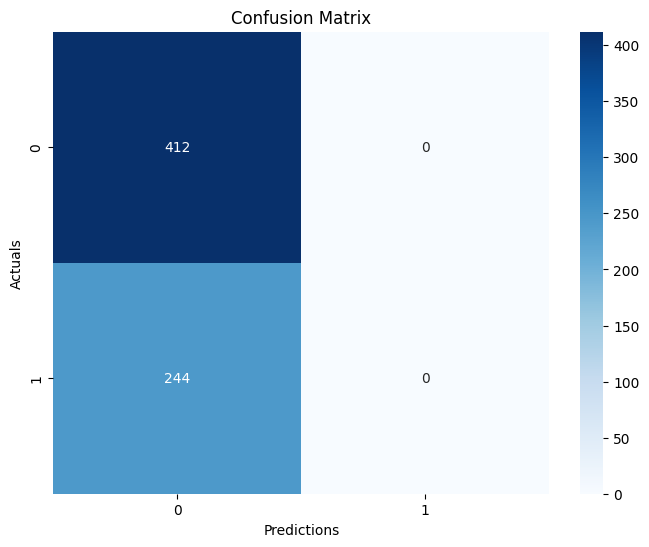

In [52]:
pred = model.predict(X_test)
pred = np.round(pred)



print("Confusion Matrix")
cm = confusion_matrix(Y_test, pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predictions')
plt.ylabel('Actuals')
plt.title('Confusion Matrix')
plt.show()

Error Analysis

21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


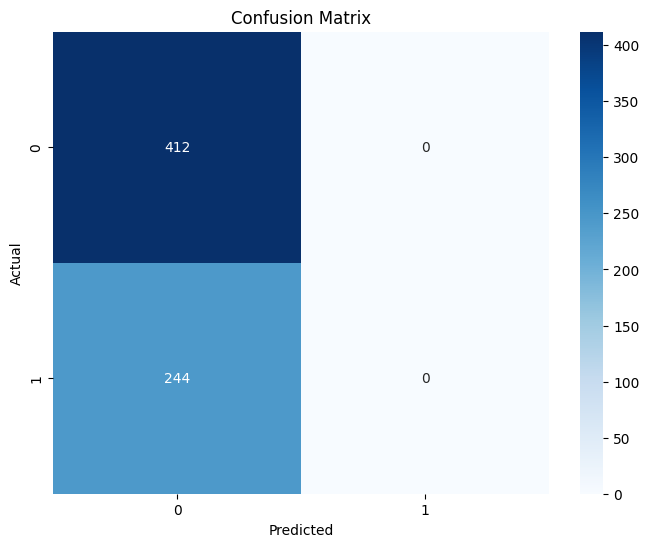

Classification Report:
              precision    recall  f1-score   support

 Not Potable       0.63      1.00      0.77       412
     Potable       0.00      0.00      0.00       244

    accuracy                           0.63       656
   macro avg       0.31      0.50      0.39       656
weighted avg       0.39      0.63      0.48       656



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [53]:
from sklearn.metrics import classification_report, confusion_matrix

# Predicting on the test set
predictions = model.predict(X_test)
predictions = (predictions > 0.5)  # Convert probabilities to binary labels

# Generate Confusion Matrix
cm = confusion_matrix(Y_test, predictions)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Print Precision, Recall, F1-Score
report = classification_report(Y_test, predictions, target_names=['Not Potable', 'Potable'])
print("Classification Report:")
print(report)
